In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d0 = pd.read_csv("train.csv")
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
l = d0['label']
print(l)

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [4]:
d = d0.drop("label", axis=1)
print(d)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


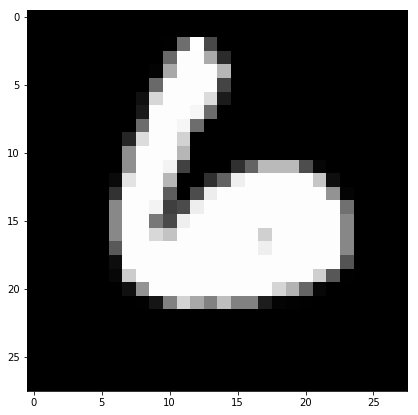

6


In [6]:
#display or plot a number
plt.figure(figsize=(7,7))
idx = 159

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  #reshape from 1-d to 2-d array
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

# 2-D visualization of mnist using PCA

In [7]:
# Pick first 15000 data-points to work on for time-effeciency.
# Exercise: Perform the same analysis on all of 42k data-points.

labels = l.head(15000)
data = d.head(15000)
print("the shape of sample data = ", data.shape, labels.shape)

the shape of sample data =  (15000, 784) (15000,)


In [8]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\john\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\Users\john\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print("The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [10]:
#find top two eigen values and vorresponding eigen vectors
#for projecting onto a 2-dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
#this code generates only top 2 (782,783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals=(782, 783))
print("shape of eigen vectors = ", vectors.shape)

#converting the eigen vectors into (2,d) shape for easyness

vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)
#here the vectors[1] represent eigen vector corress. 1st principal component
# here the vectors[2] represent eigen vector corress. 2nd principal component


shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [11]:
# projecting the original data sample on plane
#formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data point's shape ", vectors.shape, "X" , sample_data.T.shape, " = ", new_coordinates.shape)

resultant new data point's shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [12]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

#creating new data frame for plotting the labelled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


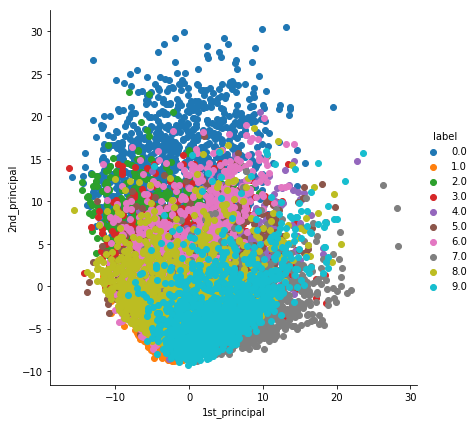

In [13]:
# plotting the 2d data with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue = "label", size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

PCA using sklearn only

In [14]:
# initianilizing pca
from sklearn import decomposition
pca = decomposition.PCA()

In [15]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (15000, 2)


C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


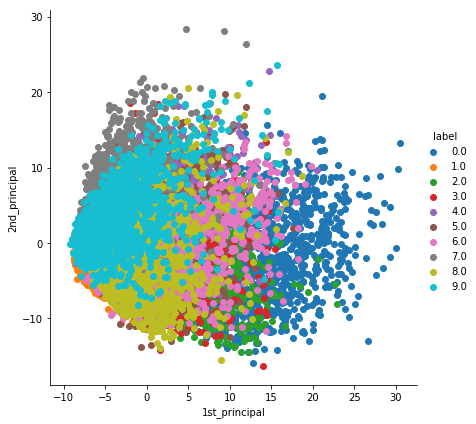

In [16]:
## attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

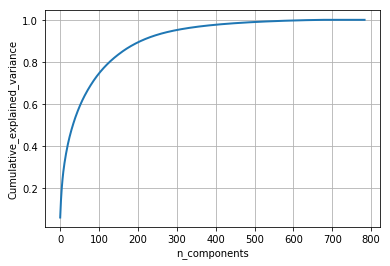

In [17]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Sckit-Learn

(1000,)
(1000, 2)


C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


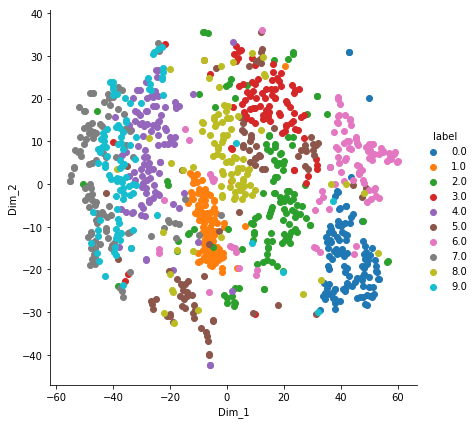

In [18]:
#t-sne

from sklearn.manifold import TSNE

#Picking the top 1000 points as TSNE takes a lot of time to process 15k points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
print(labels_1000.shape)
model = TSNE(n_components = 2, random_state = 0)
#configuring the parameteres
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for optimization = 1000

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)

#creating a new data frame which help us in ploting th result

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


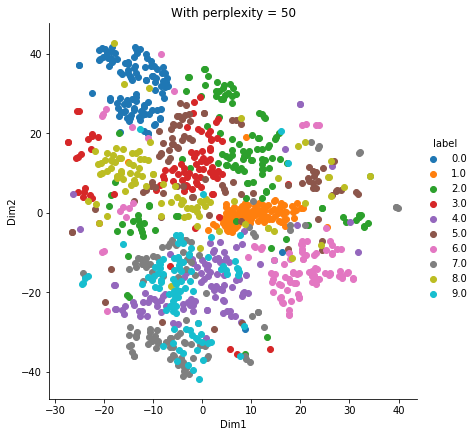

In [19]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ("Dim1", "Dim2", "label"))

sns.FacetGrid(tsne_df, hue = "label", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


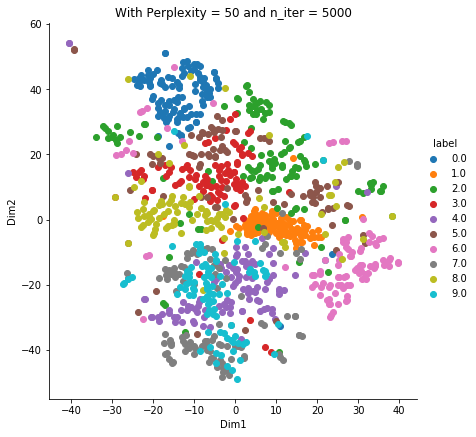

In [20]:
model = TSNE(n_components = 2, random_state = 0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim1","Dim2","label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.title("With Perplexity = 50 and n_iter = 5000")
plt.show()

In [21]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [22]:
from sklearn.manifold import TSNE
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [23]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

C:\Users\john\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\john\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\Users\john\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


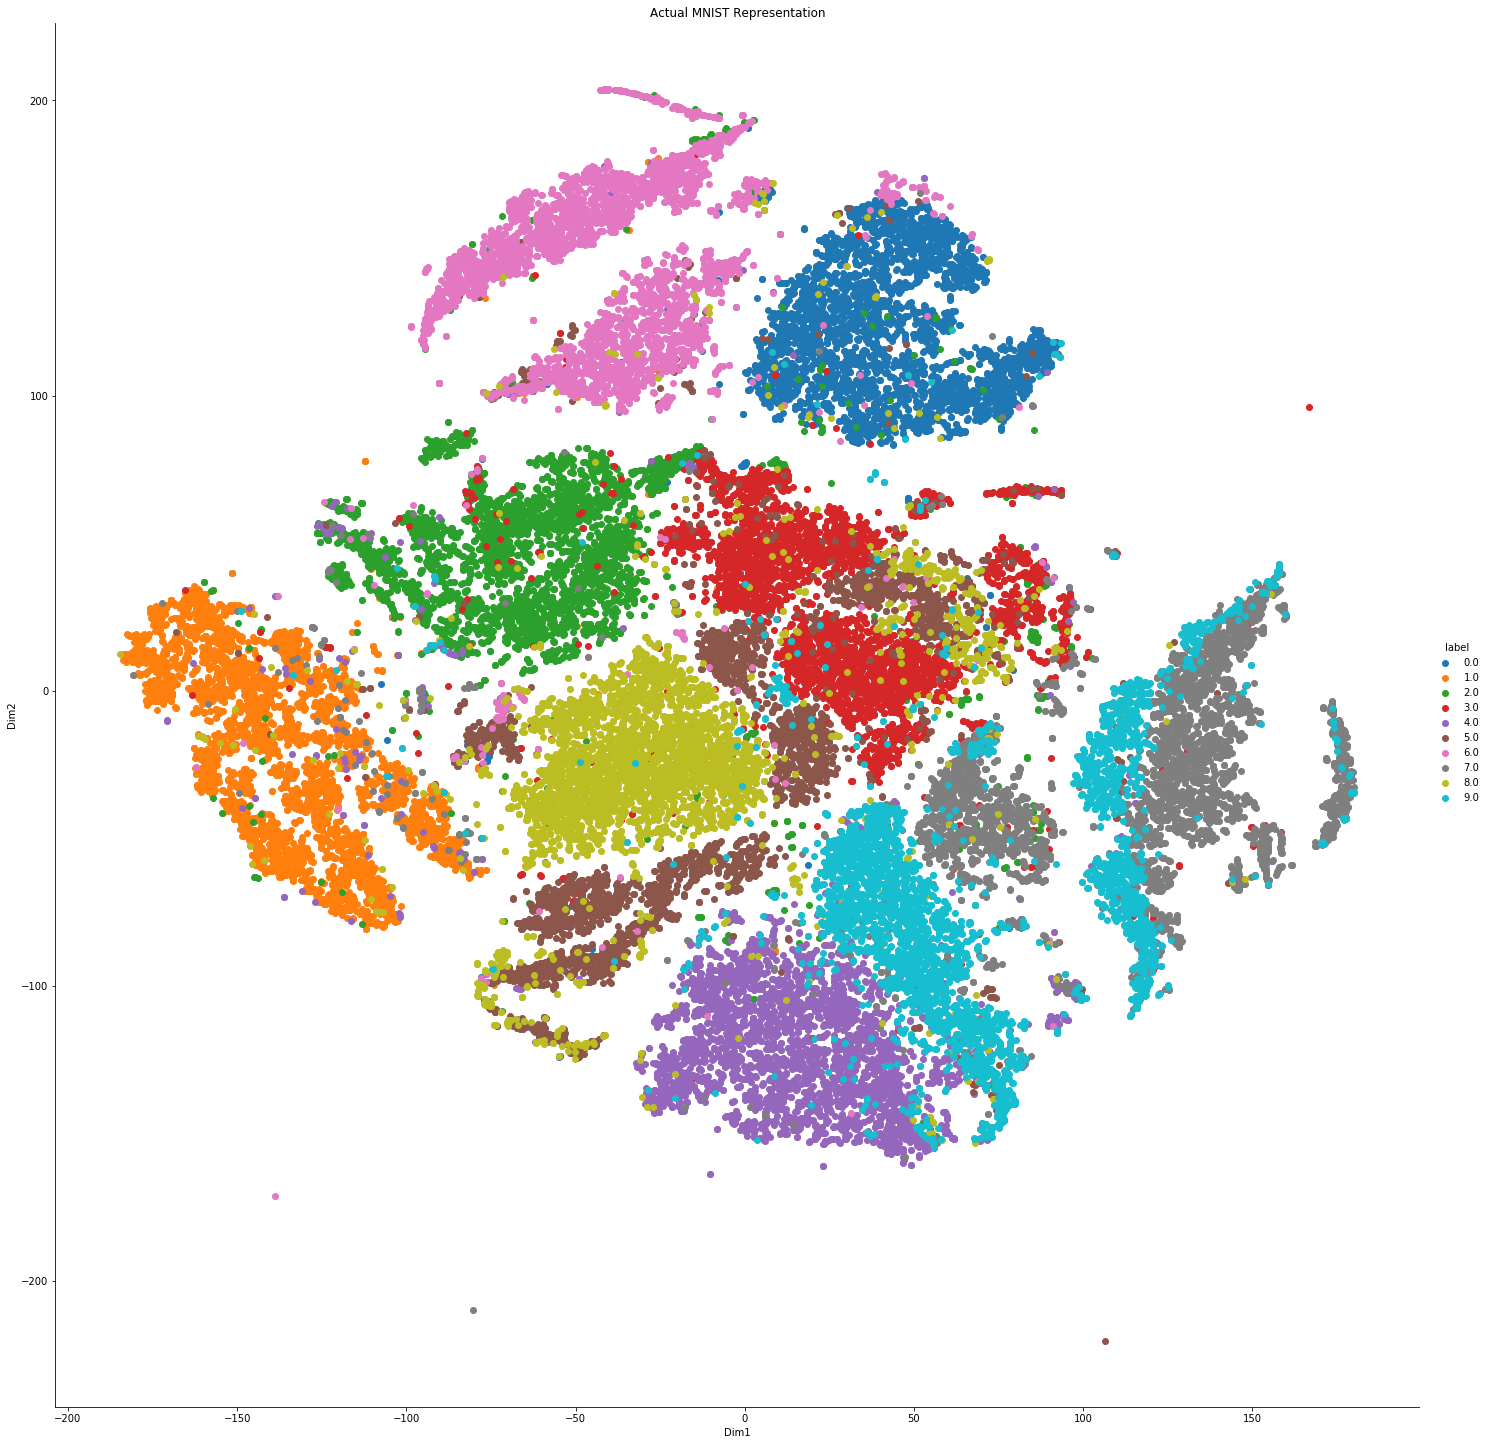

In [24]:
model = TSNE(n_components = 2, perplexity = 30, n_iter = 5000, random_state = 0)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T,l)).T

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim1", "Dim2", "label" ))

sns.FacetGrid(tsne_df, hue = "label", size = 20).map(plt.scatter, 'Dim1', 'Dim2').add_legend()

plt.title("Actual MNIST Representation")
plt.show()